In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
bank_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/banklist.csv'

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
551,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


* Github에 저장된 banklist.csv 파일을 읽어서 데이터 프레임 생성
* datetime 타입으로 변환할 수 있는 컬럼은 datetime 타입으로 변환 
* 연도별 파산한 은행 숫자를 찾고, 시각화 
* 분기별 파산한 은행 숫자를 찾고, 시각화 

In [50]:
banks = pd.read_csv(bank_file, parse_dates=['Closing Date', 'Updated Date'])

In [51]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [52]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [60]:
banks.shape

(555, 7)

In [54]:
banks['Closing Date'].min()

Timestamp('2000-10-13 00:00:00')

In [55]:
banks['Closing Date'].max()

Timestamp('2017-12-15 00:00:00')

In [61]:
s = banks.groupby(by=banks['Closing Date'].dt.year).size()
# 각각의 group에서 row의 개수
s

Closing Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

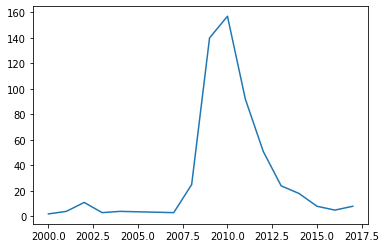

In [63]:
plt.plot(s)

plt.show()

In [64]:
banks2 = banks.set_index(keys='Closing Date')
banks2

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05
...,...,...,...,...,...,...
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2014-08-19
2001-05-03,Malta National Bank,Malta,OH,6629,North Valley Bank,2002-11-18
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2003-02-18


In [65]:
banks2.resample('Y').size()

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, dtype: int64

In [66]:
banks.groupby(by=banks['Closing Date'].dt.quarter).size()

Closing Date
1    135
2    138
3    153
4    129
dtype: int64

In [69]:
s2 = banks2.resample('Q').size()

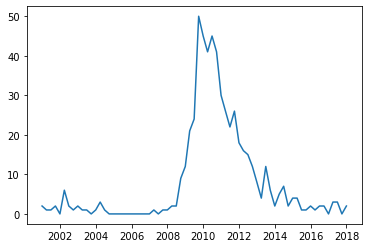

In [70]:
plt.plot(s2)
plt.show()